             Row ID   Postal Code         Sales      Quantity      Discount  \
count  34819.000000  34819.000000  34819.000000  34819.000000  34819.000000   
mean   26072.046699  56202.658850     65.601952      3.029668      0.132143   
std    15076.889770  14762.605473     57.661844      1.982985      0.206347   
min        1.000000   1453.000000      0.444000      1.000000      0.000000   
25%    12611.500000  56430.500000     21.000000      2.000000      0.000000   
50%    26713.000000  56430.500000     46.440000      2.000000      0.000000   
75%    39254.500000  56430.500000     96.000000      4.000000      0.200000   
max    51290.000000  99301.000000    252.037800     14.000000      0.800000   

             Profit  Shipping Cost  
count  34819.000000   34819.000000  
mean       9.682065       7.186868  
std       18.456926       8.775978  
min      -40.020000       0.002000  
25%        0.660000       1.730000  
50%        6.600000       4.150000  
75%       18.180000       9.2

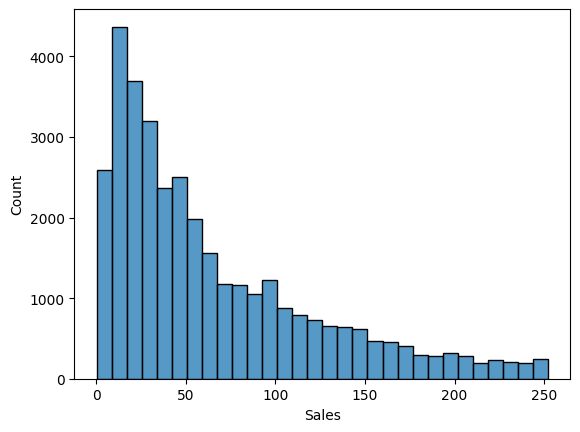

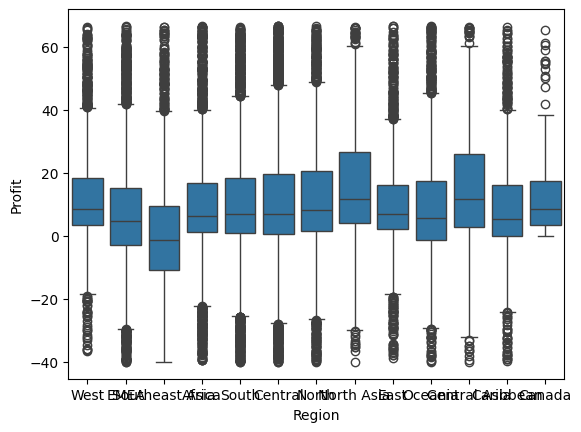

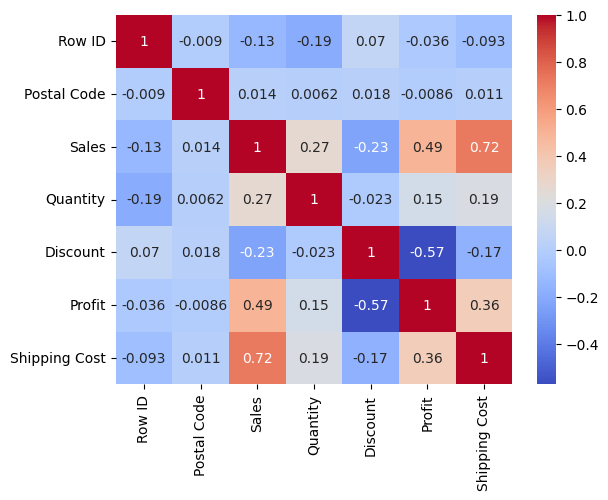

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Cleaned_Global_Superstore,csv')

# Cleaning
df.drop_duplicates(inplace=True)
df.fillna({'Sales': df['Sales'].mean(), 'Profit': df['Profit'].median()}, inplace=True)

# Outlier handling (IQR)
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Sales'] < (Q1 - 1.5 * IQR)) | (df['Sales'] > (Q3 + 1.5 * IQR)))]

# Stats summary
print(df.describe())
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)
print(numeric_df.corr())

# Visualizations
sns.histplot(df['Sales'], bins=30)
plt.show()

sns.boxplot(x='Region', y='Profit', data=df)
plt.show()

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()